In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge  # noqa F401
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Task 1: Data Exploration and Cleaning
### 1. Load the Data:

In [2]:
netflix_data = pd.read_csv("/content/netflix_titles.csv", encoding='ISO-8859-1')
netflix_data.head()


show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  ... Unnamed: 16  \
0  September 25, 2021          2020  PG-13     90 min  ...         NaN   
1  September 24, 2021          2021  TV-MA  2 Seasons  ...         NaN   
2  September 24, 2021          2021  TV-MA   1 Season  ...         NaN   
3  September 24, 2021          2021  TV-MA   1 Season  ...         NaN   
4  September 24, 2021          2021  TV-MA  2 Seasons  ...         NaN   

  Unnamed: 17  Unnamed: 18  Unnamed: 19  Unnamed: 20  Unnamed: 21  \
0         NaN          NaN          NaN          NaN          NaN   
1         NaN          NaN          NaN          NaN          NaN   
2         NaN          NaN          NaN          NaN          NaN   
3         NaN          NaN          NaN          NaN          NaN   
4         NaN          NaN          NaN          NaN          NaN   

   Unnamed: 22  Unnamed: 23  Unnamed: 24  Unnamed: 25  
0          NaN          NaN          NaN          NaN  
1          NaN          NaN          NaN          NaN  
2          NaN          NaN          NaN          NaN  
3          NaN          NaN          NaN          NaN  
4          NaN          NaN          NaN          NaN  

[5 rows x 26 columns]

In [3]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8809 non-null   object 
 1   type          8809 non-null   object 
 2   title         8809 non-null   object 
 3   director      6175 non-null   object 
 4   cast          7984 non-null   object 
 5   country       7978 non-null   object 
 6   date_added    8799 non-null   object 
 7   release_year  8809 non-null   int64  
 8   rating        8805 non-null   object 
 9   duration      8806 non-null   object 
 10  listed_in     8809 non-null   object 
 11  description   8809 non-null   object 
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null    

### 2.Investigate the Data:
  #### Missing Values:


In [4]:
netflix_data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
Unnamed: 12     8809
Unnamed: 13     8809
Unnamed: 14     8809
Unnamed: 15     8809
Unnamed: 16     8809
Unnamed: 17     8809
Unnamed: 18     8809
Unnamed: 19     8809
Unnamed: 20     8809
Unnamed: 21     8809
Unnamed: 22     8809
Unnamed: 23     8809
Unnamed: 24     8809
Unnamed: 25     8809
dtype: int64

#### Data Types:

In [5]:
netflix_data_type = netflix_data.dtypes
print(netflix_data_type)

show_id          object
type             object
title            object
director         object
cast             object
country          object
date_added       object
release_year      int64
rating           object
duration         object
listed_in        object
description      object
Unnamed: 12     float64
Unnamed: 13     float64
Unnamed: 14     float64
Unnamed: 15     float64
Unnamed: 16     float64
Unnamed: 17     float64
Unnamed: 18     float64
Unnamed: 19     float64
Unnamed: 20     float64
Unnamed: 21     float64
Unnamed: 22     float64
Unnamed: 23     float64
Unnamed: 24     float64
Unnamed: 25     float64
dtype: object


In [6]:
# Strip leading and trailing whitespace from 'date_added' column
netflix_data['date_added'] = netflix_data['date_added'].str.strip()

# Convert 'date_added' to datetime format
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'], errors='coerce')


In [7]:
netflix_data.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
Unnamed: 12            float64
Unnamed: 13            float64
Unnamed: 14            float64
Unnamed: 15            float64
Unnamed: 16            float64
Unnamed: 17            float64
Unnamed: 18            float64
Unnamed: 19            float64
Unnamed: 20            float64
Unnamed: 21            float64
Unnamed: 22            float64
Unnamed: 23            float64
Unnamed: 24            float64
Unnamed: 25            float64
dtype: object

#### Descriptive Statistics:

In [8]:
descriptive_stats = netflix_data.describe()
print(descriptive_stats)


                          date_added  release_year  Unnamed: 12  Unnamed: 13  \
count                           8799   8809.000000          0.0          0.0   
mean   2019-05-17 15:43:18.431640064   2014.181292          NaN          NaN   
min              2008-01-01 00:00:00   1925.000000          NaN          NaN   
25%              2018-04-06 00:00:00   2013.000000          NaN          NaN   
50%              2019-07-02 00:00:00   2017.000000          NaN          NaN   
75%              2020-08-19 12:00:00   2019.000000          NaN          NaN   
max              2024-04-05 00:00:00   2024.000000          NaN          NaN   
std                              NaN      8.818932          NaN          NaN   

       Unnamed: 14  Unnamed: 15  Unnamed: 16  Unnamed: 17  Unnamed: 18  \
count          0.0          0.0          0.0          0.0          0.0   
mean           NaN          NaN          NaN          NaN          NaN   
min            NaN          NaN          NaN          NaN

####Categorical Data Analysis:

In [9]:
# Identify categorical columns
categorical_columns = netflix_data.select_dtypes(include=['object']).columns
print(categorical_columns)

# Analyze distribution of categories
type_distribution = netflix_data['type'].value_counts()
print(type_distribution)


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'rating',
       'duration', 'listed_in', 'description'],
      dtype='object')
type
Movie      6132
TV Show    2677
Name: count, dtype: int64


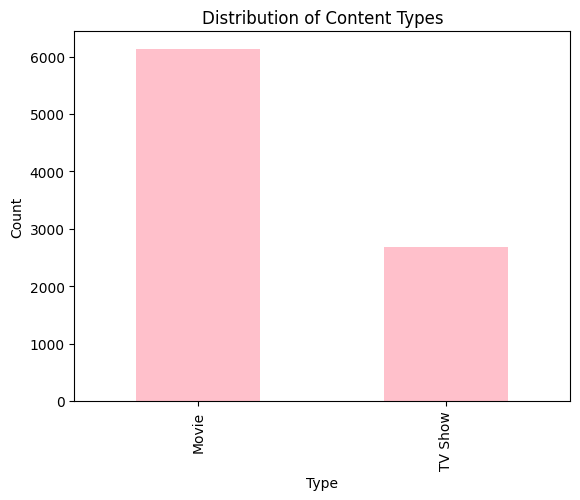

In [10]:
# Bar chart for 'type' distribution
type_distribution.plot(kind='bar', color='pink')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Content Types')
plt.show()


## Clean the Data:

Handling Missing Values
1. director
Missing Values: 2634

Strategy: Since the director column has a large number of missing values, filling them with a placeholder such as "Unknown" can be a practical approach. Alternatively, we could fill it with the mode (most common director), but this might not be very meaningful.

Relevance: Directors can be significant for certain genres or types of content. Including this feature after encoding (e.g., one-hot encoding) might add value.

2. cast
Missing Values: 825

Strategy: Similar to director, we can fill missing values with "Unknown". We could also consider extracting the most popular cast members or fill based on the most common value.
Relevance: Cast members can influence user preferences significantly. Encoding this feature might help in the recommendation system.

3. country
Missing Values: 831

Strategy: Fill missing values with "Unknown" or the most frequent country. For some datasets, we might consider filling based on other related columns like the genre or director.

Relevance: Country can provide cultural context and might influence user preferences. This feature is generally useful after encoding.

4. date_added
Missing Values: 10

Strategy: Since the number of missing values is small, you can either drop these rows or fill them with a plausible value, such as the mean or mode of the date_added column.
Relevance: The date when the content was added might be less relevant for predicting user ratings but can be useful for understanding trends.

5. For the rating, durationsince the number of the missing values are few, i will drop theses missing values

In [11]:
# Handling missing values
netflix_data['director'].fillna('Unknown', inplace=True)
netflix_data['cast'].fillna('Unknown', inplace=True)
netflix_data['country'].fillna('Unknown', inplace=True)
netflix_data['date_added'].fillna(netflix_data['date_added'].mode()[0], inplace=True)
# Drop rows where 'rating' and 'duration' columns have NaNs
netflix_data.dropna(subset=['rating', 'duration'], inplace=True)
netflix_data.isnull().sum()

show_id            0
type               0
title              0
director           0
cast               0
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
Unnamed: 12     8802
Unnamed: 13     8802
Unnamed: 14     8802
Unnamed: 15     8802
Unnamed: 16     8802
Unnamed: 17     8802
Unnamed: 18     8802
Unnamed: 19     8802
Unnamed: 20     8802
Unnamed: 21     8802
Unnamed: 22     8802
Unnamed: 23     8802
Unnamed: 24     8802
Unnamed: 25     8802
dtype: int64

In [12]:
# Drop columns from index 12 to the end
netflix_data = netflix_data.drop(netflix_data.columns[12:], axis=1)
netflix_data.head()


show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          Unknown   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          Unknown   
4      s5  TV Show           Kota Factory          Unknown   

                                                cast        country  \
0                                            Unknown  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                            Unknown        Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   
3 2021-09-24          2021  TV-MA   1 Season   
4 2021-09-24          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [13]:
# Verify that there are no more missing values
netflix_data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [14]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8802 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8802 non-null   object        
 1   type          8802 non-null   object        
 2   title         8802 non-null   object        
 3   director      8802 non-null   object        
 4   cast          8802 non-null   object        
 5   country       8802 non-null   object        
 6   date_added    8802 non-null   datetime64[ns]
 7   release_year  8802 non-null   int64         
 8   rating        8802 non-null   object        
 9   duration      8802 non-null   object        
 10  listed_in     8802 non-null   object        
 11  description   8802 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 894.0+ KB


In [15]:
netflix_data["rating"].value_counts()

rating
TV-MA       3208
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
A              1
Name: count, dtype: int64

In [16]:
# Let's clean the Title column as it contains some data preparation:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
netflix_data["title"] = netflix_data["title"].apply(clean)

In [17]:
#Print Random number from the title
print(netflix_data.title.sample(10))

7006                  hotel beau sã©jour
4405                          super drag
4047                               woman
4970                            game man
7962                             scream 
3197                            mahi nri
8575                                love
1817                    beirut oh beirut
7577                              neruda
2608    murder merci cyntoia brown stori
Name: title, dtype: object


### Task 2: Data Visualization
1. Release Year Distribution
Visualize the distribution of the "release_year" column

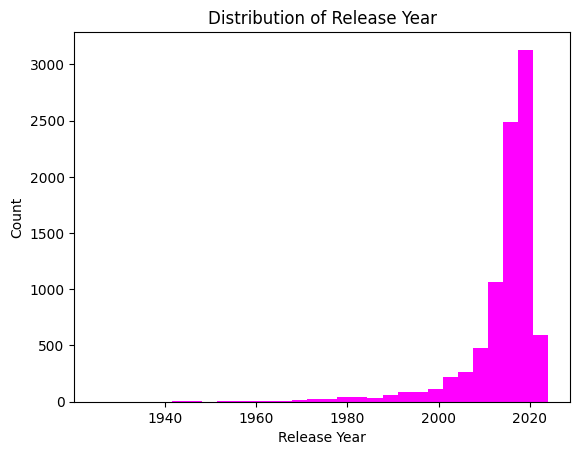

In [18]:
# Histogram for release year distribution
netflix_data['release_year'].plot(kind='hist', bins=30, color="magenta")
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()


2. Rating by Type
Calculate the average rating for "Movie" and "TV Show" categories.

We wil proceed by two way to do this

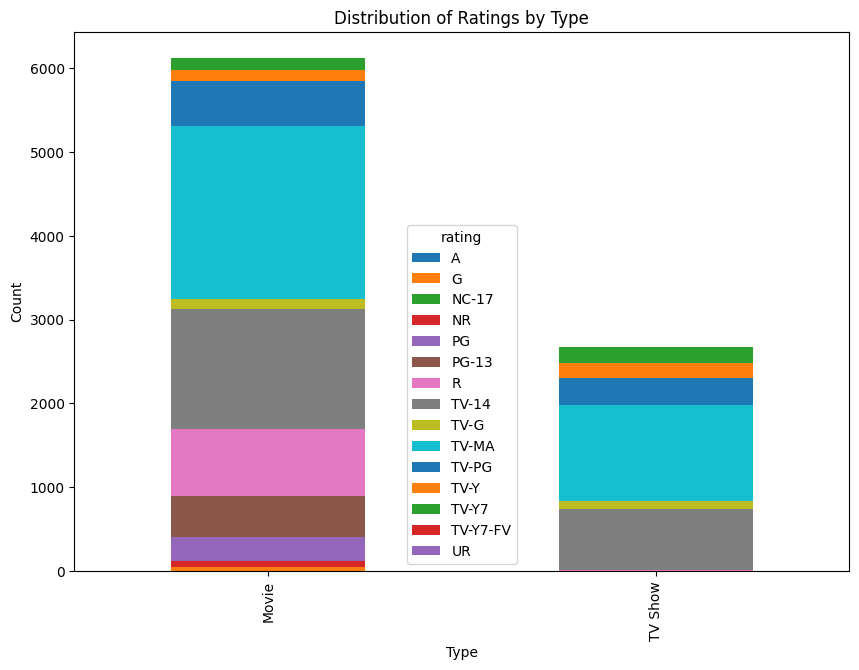

In [19]:
# First :
# Rating by Type
rating_by_type = netflix_data.groupby(['type', 'rating']).size().unstack(fill_value=0)

# Plotting
rating_by_type.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Distribution of Ratings by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


3. Duration vs Rating
Visualize the relationship between "duration" and "rating"


Average Rating by Type:
type
Movie      3.173168
TV Show    3.027664
Name: rating_num, dtype: float64


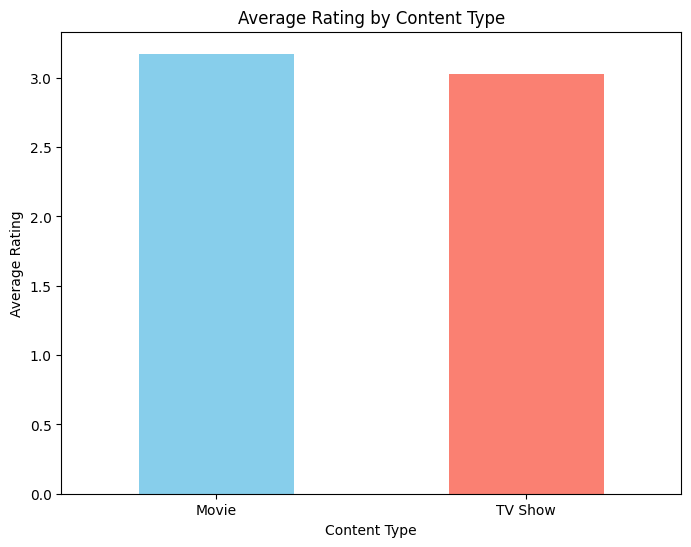

In [20]:
# Map ratings to numeric values
rating_mapping = {
    'G': 1,
    'TV-G': 1,
    'PG': 2,
    'TV-PG': 2,
    'PG-13': 3,
    'TV-14': 3,
    'R': 4,
    'TV-MA': 4,
    'NC-17': 5,
    'NR': 0,
    'UR': 0,
    'A': 0,
    'TV-Y': 1,
    'TV-Y7': 2,
    'TV-Y7-FV': 2,
    'Not Rated': 0
}
netflix_data['rating_num'] = netflix_data['rating'].map(rating_mapping)

# Handle any unmapped ratings (shouldn't be necessary if all ratings are covered)
netflix_data['rating_num'].fillna(0, inplace=True)

# Calculate the average rating for each type
average_rating = netflix_data.groupby('type')['rating_num'].mean()
print("\nAverage Rating by Type:")
print(average_rating)

# Create a bar chart to compare average ratings
average_rating.plot(kind='bar', color=['skyblue', 'salmon'], figsize=(8, 6))
plt.title('Average Rating by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.show()

 #### Interpretation :
 By analyzing this chart, we see there is a preference for Movie type than TV Show based on their average ratings:

This comparison can provide insights into user preferences and content type distribution on Netflix.

In [21]:
netflix_data["duration"].value_counts()

duration
1 Season     1792
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: count, Length: 220, dtype: int64

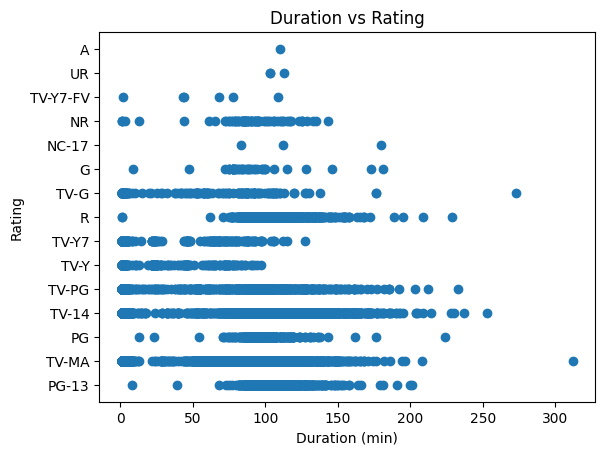

In [22]:
# Convert duration to numeric values (only for 'Movies')
netflix_data['duration'] = netflix_data['duration'].str.extract('(\d+)').astype(float)

# Scatter plot for duration vs rating
plt.scatter(netflix_data['duration'], netflix_data['rating'])
plt.title('Duration vs Rating')
plt.xlabel('Duration (min)')
plt.ylabel('Rating')
plt.show()


      type duration  duration_min
0    Movie     90.0          90.0
1  TV Show      2.0           2.0
2  TV Show      1.0           1.0
3  TV Show      1.0           1.0
4  TV Show      2.0           2.0


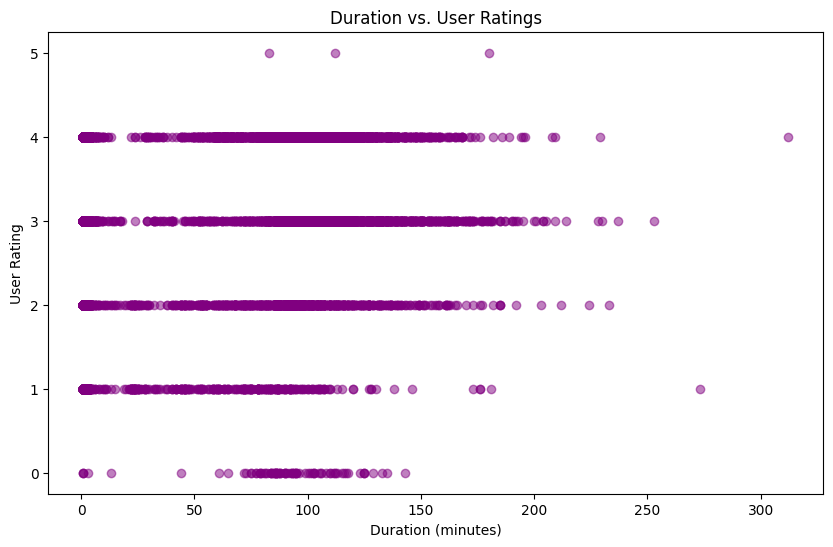

In [23]:
# Ensure all values in 'duration' column are strings
netflix_data['duration'] = netflix_data['duration'].astype(str)

# Standardize duration using vectorized operations
netflix_data['duration_min'] = netflix_data['duration'].str.extract(r'(\d+)').astype(float)
netflix_data.loc[netflix_data['duration'].str.contains('Season'), 'duration_min'] *= 60  # Assuming 1 Season = 60 minutes

# Display a sample of the data to ensure the mapping is correct
print(netflix_data[['type', 'duration', 'duration_min']].head())

# Scatter plot for all content types
plt.figure(figsize=(10, 6))
plt.scatter(netflix_data['duration_min'], netflix_data['rating_num'], alpha=0.5, color='purple')

plt.title('Duration vs. User Ratings')
plt.xlabel('Duration (minutes)')
plt.ylabel('User Rating')
plt.show()

No Correlation: the ratings are evenly distributed regardless of content length.

This visualization helps in understanding user preferences related to the duration of Netflix content.

4. Genre Exploration
Identify the most frequent genres.

listed_in
International Movies            2752
Dramas                          2426
Comedies                        1674
International TV Shows          1350
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      580
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         450
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     175
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows             

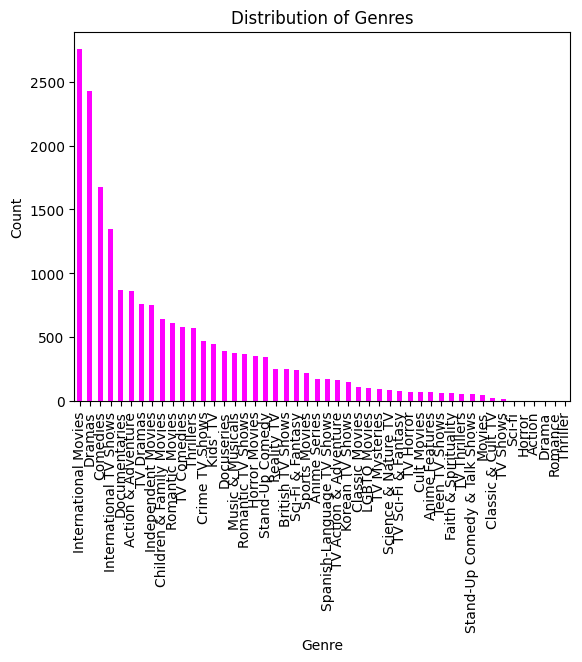

In [24]:
# Split 'listed_in' column and explode to get individual genres
genres = netflix_data['listed_in'].str.split(',').explode().str.strip()
genre_counts = genres.value_counts()
print(genre_counts)

# Bar chart for genre distribution
genre_counts.plot(kind='bar', color="magenta")
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()


The Most frequent genre is International Movies

### Task 3: Building a Simple Recommendation Model
1. Identify Features
Choose features for the recommendation model.

In [25]:
netflix_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'rating_num', 'duration_min'],
      dtype='object')

In [26]:
netflix_data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
rating_num      0
duration_min    0
dtype: int64

In [27]:
# Select features and target variable
features = ['type', 'title', 'release_year', 'duration_min', 'listed_in']
X = netflix_data[features]
y = netflix_data['rating_num']

# Preprocessing for all features using OneHotEncoder
categorical_features = ['type', 'title', 'release_year', 'listed_in']
numerical_features = ['duration_min']

# Apply OneHotEncoder to categorical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for both categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  # Pass through numerical features without transformation
)

# Define the model
model = LinearRegression()

# Create and evaluate the pipeline
pipeline = make_pipeline(preprocessor, model)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Predict ratings on the testing set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')


Mean Squared Error: 1.084803713764175
R-squared: -0.15854377276189235
Mean Absolute Error: 0.7814805718660305
